In [1]:
import pandas as pd
import os
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import tensorflow as tf

from numpy import mean
from numpy import std

from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from tensorflow import keras
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection
from sklearn.linear_model import Ridge

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [2]:
current_directory = os.getcwd()
print("Current Directory:", current_directory)
df_dims = pd.read_excel('dataframe_withdims.xlsx')
df_AAL = pd.read_excel('ALLabsoluteloading_postMOSAEC.xlsx')

Current Directory: C:\Users\Kshitij Tiwari


In [3]:
keywords = df_dims['MOF'].tolist();
df_AAL['Matched'] = df_AAL['MOF'].str.contains('|'.join(keywords), case=False)

In [4]:
matched_rows = df_AAL[df_AAL['Matched'] == True]
#matched_rows.to_excel('matched_file.xlsx', index=False)
combined_df = pd.merge(df_dims, matched_rows, on='MOF', how='inner')
combined_df.to_excel('combined_matched_rows.xlsx', index=False)

In [5]:
#print('matched_file.xlsx')
#features = df_newcolumns.tolist()
df_new = pd.read_excel('combined_matched_rows.xlsx')
df_new.head()

,MOF,PLD,LCD,Density (g/cc),VSA (m2/cc),GSA (m2/g),VF,PV (cc/g),K0_CH4,K0_CO2,...,CH4 loading (mol/kg),CO2 error (mol/kg),CH4 error (mol/kg),Selectivity (CO2),Selectivity error,TSN,logS error,TSN error,logS,Matched
0,RAHRUP_stripped.cif,3.86749,4.67492,1.50461,372.975,247.887,0.45690,0.303666,0.000010,2.046880,...,0.014163,0.030273,0.008577,228.666415,138.498648,7.640361,0.263043,0.854864,2.359202,True
1,JUWSUR_stripped.cif,4.94079,5.62912,1.79242,972.291,542.446,0.49170,0.274322,0.000008,0.000402,...,0.236155,0.022050,0.052643,15.437307,3.442527,4.333045,0.096848,0.354039,1.188572,True
2,ABEXIQ_stripped.cif,4.07988,4.80036,1.78760,605.013,338.450,0.48434,0.270944,0.000005,0.045327,...,0.021570,0.029571,0.002536,199.506435,23.494075,9.897497,0.051143,0.230354,2.299957,True
3,TANBIV_stripped.cif,4.00937,5.61624,1.45419,552.742,380.103,0.51474,0.353971,0.000011,438.327000,...,0.201083,0.050844,0.011112,22.864171,1.288542,6.248846,0.024475,0.132053,1.359155,True
4,ABEXOW_stripped.cif,4.04136,4.77169,1.81243,582.737,321.522,0.47998,0.264826,0.000005,0.018944,...,0.021082,0.028442,0.001810,201.859797,17.384624,9.809360,0.037402,0.172143,2.305050,True


In [6]:
#cleaning the data
df_new.dropna(inplace=True) #DATA IMPUTATION, i.e. dealing with missing values

In [7]:
columns_sc = ["PLD", "LCD", "Density (g/cc)", "VSA (m2/cc)", "GSA (m2/g)", "VF ", "PV (cc/g)", "K0_CH4","K0_CO2","K0_H2S","K0_H20","DC_CH4","DC_CO2","DC_H2S","P_CH4","P_CH4","P_CO2","P_H2S","Qst_CH4","Qst_CO2","Qst_H2S","Qst_H2O","Maximum Dimensions"]
#POWER TRANSFORMER INIT
r_scale = df_new[columns_sc]
scaler = PowerTransformer()　
r_scaled_df = scaler.fit_transform(r_scale) 
df_new[columns_sc] = r_scaled_df

In [8]:
X = df_new[['PLD', 'LCD', 'Density (g/cc)', 'VSA (m2/cc)', 'GSA (m2/g)', "VF ", 'PV (cc/g)', 'K0_CH4','K0_CO2','K0_H2S','K0_H20','DC_CH4','DC_CO2','DC_H2S','P_CH4','P_CH4','P_CO2','P_H2S','Qst_CH4','Qst_CO2','Qst_H2S','Qst_H2O','Maximum Dimensions']]
Y = df_new[['TSN']]

#print(X.shape)
#print(Y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

estimator = RandomForestRegressor() 
rfe = RFE(estimator, n_features_to_select=14) 
rfe.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = rfe.support_

# Subset the training and testing data with the selected features
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

C:\Users\Kshitij Tiwari\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\Kshitij Tiwari\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\Kshitij Tiwari\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\Kshitij Tiwari\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A

Epoch 1/100
67/67 [==============================] - 2s 12ms/step - loss: 48.6271 - mean_absolute_error: 5.1998 - val_loss: 34.7971 - val_mean_absolute_error: 4.1535
Epoch 2/100
67/67 [==============================] - 0s 4ms/step - loss: 24.9776 - mean_absolute_error: 3.4892 - val_loss: 14.9959 - val_mean_absolute_error: 2.6279
Epoch 3/100
67/67 [==============================] - 0s 3ms/step - loss: 13.8094 - mean_absolute_error: 2.4731 - val_loss: 10.5112 - val_mean_absolute_error: 2.0837
Epoch 4/100
67/67 [==============================] - 0s 3ms/step - loss: 10.6882 - mean_absolute_error: 2.1535 - val_loss: 8.9444 - val_mean_absolute_error: 1.8802
Epoch 5/100
67/67 [==============================] - 0s 3ms/step - loss: 9.4837 - mean_absolute_error: 1.9916 - val_loss: 8.1296 - val_mean_absolute_error: 1.7785
Epoch 6/100
67/67 [==============================] - 0s 3ms/step - loss: 8.6416 - mean_absolute_error: 1.9174 - val_loss: 7.5895 - val_mean_absolute_error: 1.7112
Epoch 7/100
67

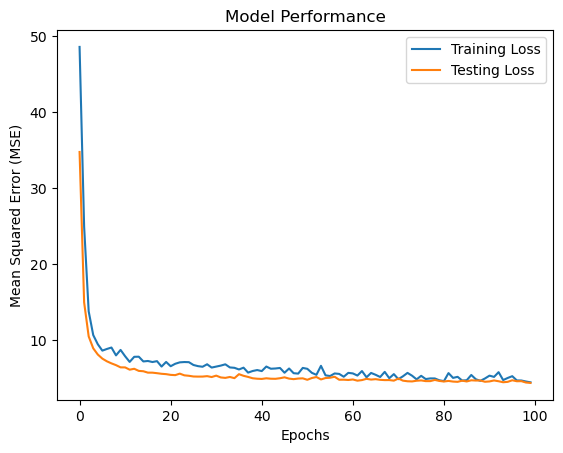

29/29 [==============================] - 0s 2ms/step


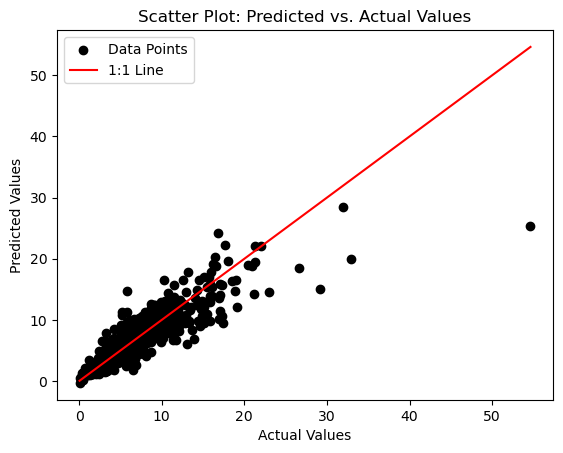

Epoch 1/100
67/67 [==============================] - 2s 10ms/step - loss: 47.3274 - mean_absolute_error: 5.1313 - val_loss: 33.0442 - val_mean_absolute_error: 4.0316
Epoch 2/100
67/67 [==============================] - 0s 3ms/step - loss: 24.1287 - mean_absolute_error: 3.3225 - val_loss: 14.3197 - val_mean_absolute_error: 2.5177
Epoch 3/100
67/67 [==============================] - 0s 4ms/step - loss: 13.1646 - mean_absolute_error: 2.3448 - val_loss: 10.0334 - val_mean_absolute_error: 1.9635
Epoch 4/100
67/67 [==============================] - 0s 3ms/step - loss: 10.0705 - mean_absolute_error: 2.0024 - val_loss: 8.4922 - val_mean_absolute_error: 1.7613
Epoch 5/100
67/67 [==============================] - 0s 4ms/step - loss: 9.4829 - mean_absolute_error: 1.8929 - val_loss: 7.8183 - val_mean_absolute_error: 1.6449
Epoch 6/100
67/67 [==============================] - 0s 4ms/step - loss: 8.3967 - mean_absolute_error: 1.8186 - val_loss: 7.3385 - val_mean_absolute_error: 1.5932
Epoch 7/100
67

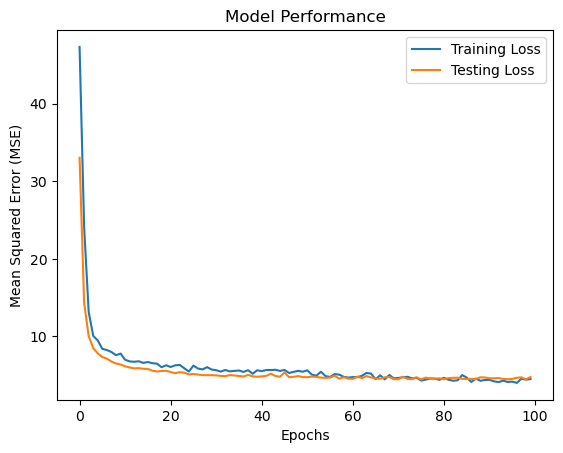

29/29 [==============================] - 0s 2ms/step


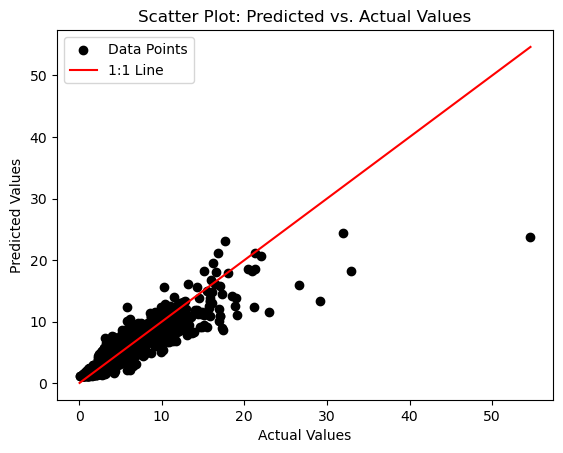

Epoch 1/100
67/67 [==============================] - 2s 9ms/step - loss: 56.2867 - mean_absolute_error: 5.8639 - val_loss: 48.3806 - val_mean_absolute_error: 5.2945
Epoch 2/100
67/67 [==============================] - 0s 3ms/step - loss: 39.2817 - mean_absolute_error: 4.4722 - val_loss: 23.2834 - val_mean_absolute_error: 3.2225
Epoch 3/100
67/67 [==============================] - 0s 3ms/step - loss: 17.6240 - mean_absolute_error: 2.7503 - val_loss: 11.1323 - val_mean_absolute_error: 2.1465
Epoch 4/100
67/67 [==============================] - 0s 3ms/step - loss: 11.9215 - mean_absolute_error: 2.2488 - val_loss: 9.2476 - val_mean_absolute_error: 1.9003
Epoch 5/100
67/67 [==============================] - 0s 3ms/step - loss: 10.2336 - mean_absolute_error: 2.0622 - val_loss: 8.1928 - val_mean_absolute_error: 1.8033
Epoch 6/100
67/67 [==============================] - 0s 3ms/step - loss: 9.7524 - mean_absolute_error: 2.0184 - val_loss: 7.7083 - val_mean_absolute_error: 1.7174
Epoch 7/100
67

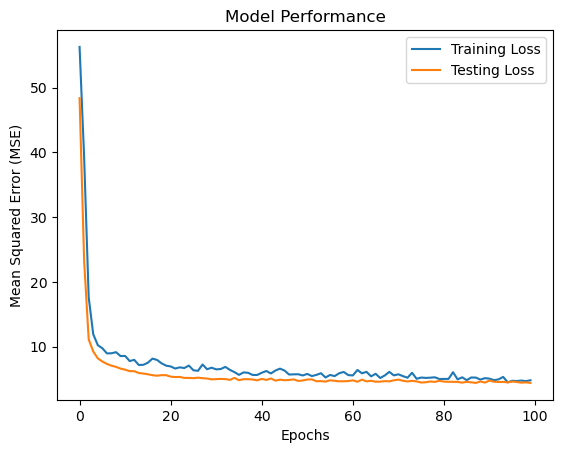

29/29 [==============================] - 0s 3ms/step


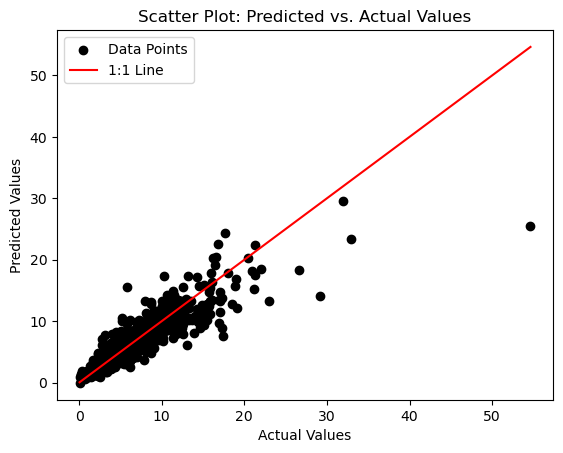

Epoch 1/100
67/67 [==============================] - 2s 15ms/step - loss: 50.5733 - mean_absolute_error: 5.3954 - val_loss: 38.2550 - val_mean_absolute_error: 4.5136
Epoch 2/100
67/67 [==============================] - 0s 4ms/step - loss: 26.8033 - mean_absolute_error: 3.5408 - val_loss: 13.0856 - val_mean_absolute_error: 2.4484
Epoch 3/100
67/67 [==============================] - 0s 4ms/step - loss: 11.8239 - mean_absolute_error: 2.3040 - val_loss: 8.9816 - val_mean_absolute_error: 1.9740
Epoch 4/100
67/67 [==============================] - 0s 4ms/step - loss: 9.4704 - mean_absolute_error: 1.9776 - val_loss: 7.6273 - val_mean_absolute_error: 1.7203
Epoch 5/100
67/67 [==============================] - 0s 4ms/step - loss: 8.2943 - mean_absolute_error: 1.8111 - val_loss: 7.0518 - val_mean_absolute_error: 1.6049
Epoch 6/100
67/67 [==============================] - 0s 4ms/step - loss: 8.4303 - mean_absolute_error: 1.7672 - val_loss: 6.7627 - val_mean_absolute_error: 1.5783
Epoch 7/100
67/6

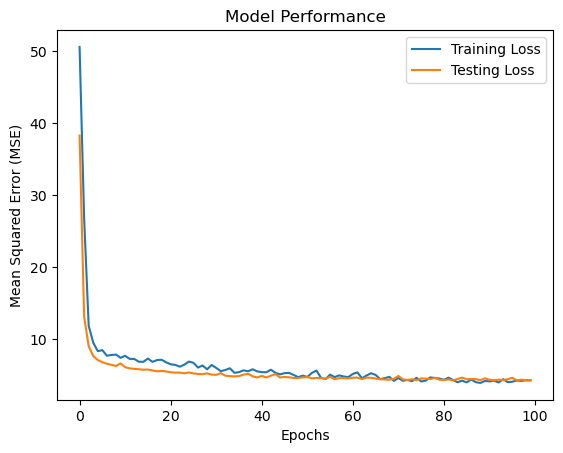

29/29 [==============================] - 0s 2ms/step


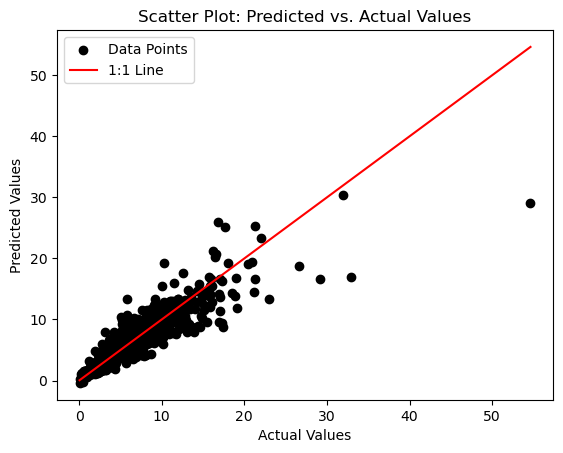

Epoch 1/100
67/67 [==============================] - 2s 11ms/step - loss: 47.2432 - mean_absolute_error: 5.1223 - val_loss: 32.8853 - val_mean_absolute_error: 4.0229
Epoch 2/100
67/67 [==============================] - 0s 3ms/step - loss: 21.6428 - mean_absolute_error: 3.1161 - val_loss: 10.3125 - val_mean_absolute_error: 2.0671
Epoch 3/100
67/67 [==============================] - 0s 4ms/step - loss: 11.1032 - mean_absolute_error: 2.1694 - val_loss: 8.1743 - val_mean_absolute_error: 1.8044
Epoch 4/100
67/67 [==============================] - 0s 4ms/step - loss: 10.8938 - mean_absolute_error: 2.1037 - val_loss: 7.4799 - val_mean_absolute_error: 1.7156
Epoch 5/100
67/67 [==============================] - 0s 4ms/step - loss: 9.3163 - mean_absolute_error: 1.9820 - val_loss: 7.0670 - val_mean_absolute_error: 1.6259
Epoch 6/100
67/67 [==============================] - 0s 3ms/step - loss: 8.9495 - mean_absolute_error: 1.9098 - val_loss: 6.6851 - val_mean_absolute_error: 1.5777
Epoch 7/100
67/

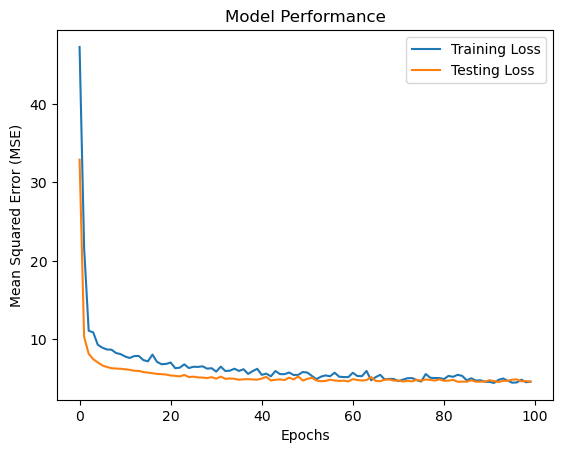

29/29 [==============================] - 0s 3ms/step


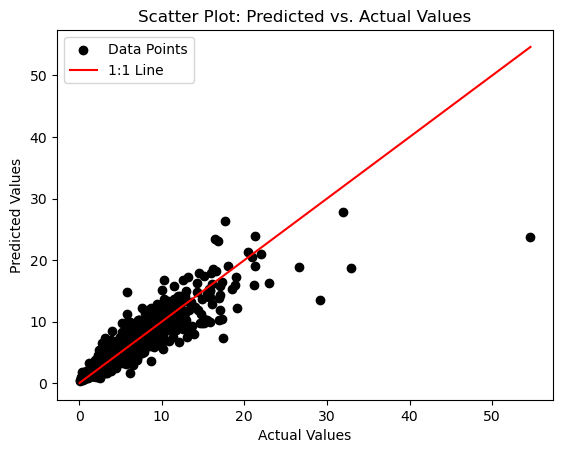

Epoch 1/100
67/67 [==============================] - 2s 8ms/step - loss: 47.1694 - mean_absolute_error: 5.1573 - val_loss: 30.9521 - val_mean_absolute_error: 3.9183
Epoch 2/100
67/67 [==============================] - 0s 3ms/step - loss: 21.0680 - mean_absolute_error: 3.0979 - val_loss: 12.6404 - val_mean_absolute_error: 2.3085
Epoch 3/100
67/67 [==============================] - 0s 3ms/step - loss: 12.6886 - mean_absolute_error: 2.3282 - val_loss: 9.3613 - val_mean_absolute_error: 1.8859
Epoch 4/100
67/67 [==============================] - 0s 3ms/step - loss: 10.6897 - mean_absolute_error: 2.0603 - val_loss: 7.7522 - val_mean_absolute_error: 1.6688
Epoch 5/100
67/67 [==============================] - 0s 3ms/step - loss: 8.9192 - mean_absolute_error: 1.8717 - val_loss: 7.0948 - val_mean_absolute_error: 1.5613
Epoch 6/100
67/67 [==============================] - 0s 3ms/step - loss: 8.3451 - mean_absolute_error: 1.8168 - val_loss: 6.6063 - val_mean_absolute_error: 1.5099
Epoch 7/100
67/6

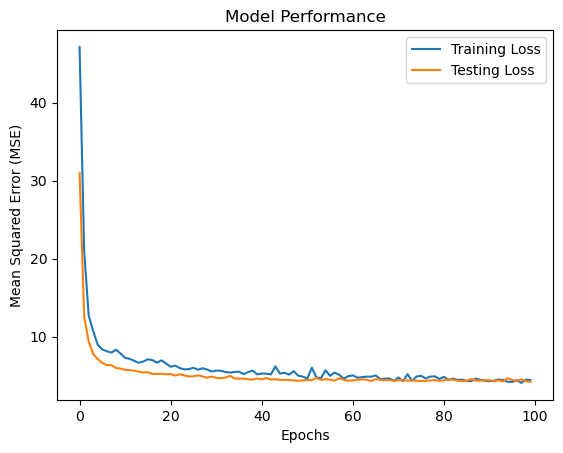

29/29 [==============================] - 0s 2ms/step


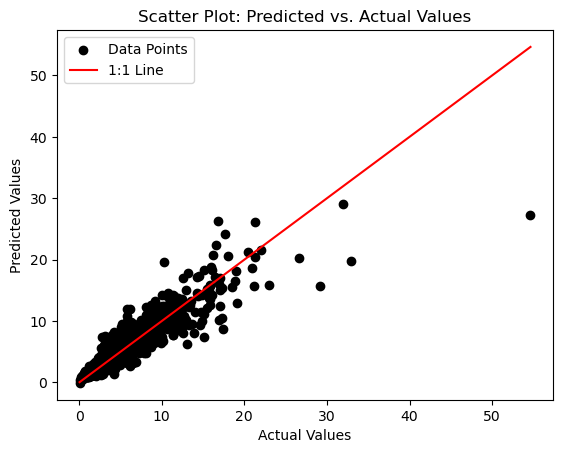

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.206211805343628 - MAE: 1.0977975130081177 - R2_Score: 0.8094627043956386%
------------------------------------------------------------------------
> Fold 2 - Loss: 2.96299147605896 - MAE: 1.070363998413086 - R2_Score: 0.8094627043956386%
------------------------------------------------------------------------
> Fold 3 - Loss: 7.02212381362915 - MAE: 1.182397723197937 - R2_Score: 0.8094627043956386%
------------------------------------------------------------------------
> Fold 4 - Loss: 1.9556385278701782 - MAE: 0.9271884560585022 - R2_Score: 0.8094627043956386%
------------------------------------------------------------------------
> Fold 5 - Loss: 2.6698882579803467 - MAE: 1.0491952896118164 - R2_Score: 0.8094627043956386%
------------------------------------------------------------------------
> Fold 6 - 

"\nfig = plot_sequential_feature_selection(sfs.get_metric_dict(), kind='std_dev')\nplt.title('Sequential Forward Selection (SFS)')\nplt.xlabel('Number of Features')\nplt.ylabel('Performance')\nplt.show()\n"

In [9]:
#SEQUENTIAL FEATURE SELECTION BLOCK
"""
model = LinearRegression()
sfs = SequentialFeatureSelector(model, k_features=10, forward=True, floating=False, scoring='neg_mean_squared_error', cv=5)
sfs.fit(X_train, y_train)

selected_feature_indices = list(sfs.k_feature_idx_)

X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]
"""

num_folds = 6

acc_per_fold = []
loss_per_fold = []

inputs = np.concatenate((X_train_selected, X_test_selected), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1
for train, test in kfold.split(X_train_selected, y_train):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=16, activation='relu',  kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(X_train_selected.shape[1],)))
    #model.add(keras.layers.Dropout(0.001))
    model.add(keras.layers.Dense(units=16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))  
    #model.add(keras.layers.Dropout(0.01))
    model.add(keras.layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
    #model.add(keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
    model.add(keras.layers.Dropout(0.1))
    #model.add(keras.layers.Dense(units=8, activation='relu'))  #L2 regularization
    #model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(units=1))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
    #model.fit(X_train_selected, y_train, epochs=1000, batch_size=32, verbose=1)
    history = model.fit(X_train_selected, y_train, epochs=100, batch_size=32, validation_data=(X_test_selected, y_test), verbose=1)
    # Generate generalization metrics
    
    # Make predictions on the entire dataset
    #y_pred = model.predict(X_selected)
    
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    #print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}')
    
    test_r2 = r2_score(y_test, model.predict(X_test_selected))
    print(f"R2 Score: {test_r2}")
    acc_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])
    
    # Increase fold number
    fold_no = fold_no + 1
    
    # Plot the training and testing performance over epochs
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Testing Loss')
    plt.title('Model Performance')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.legend()
    plt.show()
    
    # Assuming y_pred and y_actual are numpy arrays or pandas Series with the same length
    y_pred = model.predict(X_test_selected).flatten()  # Flatten predictions if necessary
    y_actual = y_test.values.flatten()  # Convert y_test to numpy array if it's a pandas Series

    # Check if the data is non-empty
    if len(y_actual) == 0 or len(y_pred) == 0:
        print("Error: Data is empty.")
    else:
        # Create the scatter plot
        plt.scatter(y_actual, y_pred, label="Data Points",c='black')
        plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', label="1:1 Line")
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title("Scatter Plot: Predicted vs. Actual Values")
        plt.legend()
        plt.show()
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - MAE: {acc_per_fold[i]} - R2_Score: {test_r2}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> MAE: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> R2 Score: {np.mean(test_r2)}')
print('------------------------------------------------------------------------')

"""    
# Evaluate the model on training data
train_loss, train_mae = model.evaluate(X_train_selected, y_train, verbose=0)
train_r2 = r2_score(y_train, model.predict(X_train_selected))
print("Training set metrics:")
print(f"Mean Squared Error (MSE): {train_loss}")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"R2 Score: {train_r2}")

# Evaluate the model on testing data
test_loss, test_mae = model.evaluate(X_test_selected, y_test, verbose=0)
test_r2 = r2_score(y_test, model.predict(X_test_selected))
print("Testing set metrics:")
print(f"Mean Squared Error (MSE): {test_loss}")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"R2 Score: {test_r2}")

"""

"""
fig = plot_sequential_feature_selection(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (SFS)')　
plt.xlabel('Number of Features')
plt.ylabel('Performance')
plt.show()
"""

# Make predictions on new data
#predictions = model.predict(X_test)
